<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Привет еще раз. Спасибо, что доделала работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет, Ирина! Спасибо, что прислала задание:) Меня зовут Слепцов Артем и я буду проверять твой проект) Ты проделала большую работу над проектом, однако его еще можно улучшить. Будет здорово, если ты, надеюсь, не против, если я буду на ты, будешь отвечать на комментарии и участвовать в диалоге. 

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно. Рекомендации укажу таким же цветом; <font color=orange>оранжевый</font> - некритичные замечания. Если таких замечаний меньше трех - проект может быть принят без их отработки; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 
</div>

<div class="alert alert-block alert-info">
<font size="2"><b>Правки_1</b></font>
    
Привет, Артем! 
    
Большое спасибо за проверку и подробные комментарии. Я постаралась учесть все замечания, но, возможно, еще потребуются некоторые комментарии с твоей стороны. (только учусь :) 
    
Для удобства новые пояснения писала в таких синих блоках. 
</div>

План работы:\
[Шаг 1. Постановка задачи. Описание данных](#step_1) \
[Шаг 2. Открытие файла с данными и изучение общей информации](#step_2)\
[Шаг 3. Подготовка данных](#step_3)\
[Шаг 4. Исследовательский анализ данных](#step_4) \
[Шаг 5. Составление портрета пользователя каждого региона](#step_5)\
[Шаг 6. Исследование статистических показателей](#step_6)\
[Шаг 7. Проверка гипотез](#step_7) \
[Шаг 8. Общий вывод](#step_8)

<a id='step_1'></a>
# Шаг 1. Постановка задачи. Описание данных 


* Контекст задачи:
Интернет-магазине «Стримчик» хочет зарабатывать больше денег, продавая компьютерные игры по всему миру. Если сделать ставку на потенциально популярные продукты и спранировать рекламные кампании на основе аналитики, можно увеличить прибыль. 
Необходимо выявить определяющие успешность игры закономерности и спланировать кампанию на 2017-й.
* Предполагаемый конечный заказчик: рекламщики, специалисты по закупкам, менежеры и руководство.

Дано: games.csv
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (от 0 до 100)
* User_Score — оценка пользователей (от 0 до 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Описание данных также хорошо бы привести в данном разделе преокта. Еще лучше будет, если ты сделаешь план работы с гиперссылками. Да, есть плагин ToC. Но хорошо бы уметь реализовывать интерактивный план проекта вручную. Как это реализовать - смотри по [ссылке](https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook/49717704).

</div>

In [1]:
# импорт библиотек
import pandas as pd
import re # для регулярных выражений
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st # для расчета статистики
import seaborn as sns

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение. 

</div>

<a id='step_2'></a>
# Шаг 2. Загрузка файла с данными и изучение общей информации

In [2]:
# загрузка данных по компьютерным играм
games_df = pd.read_csv('/datasets/games.csv')

In [3]:
# предпросмотр случайных строк, с целью ознакомиться с датасетом
games_df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13670,Hana to Ikimo no Rittai Zukan,3DS,2011.0,Misc,0.00,0.00,0.04,0.00,NaN,NaN,NaN
15377,Sniper Elite V2,WiiU,2013.0,Shooter,0.00,0.02,0.00,0.00,58.0,5.8,M
566,Professor Layton and the Last Specter,DS,2009.0,Puzzle,0.28,1.39,0.68,0.32,83.0,8.7,E10+
6028,FIFA Soccer 13,3DS,2012.0,Action,0.06,0.20,0.00,0.03,68.0,3.7,E
9223,Doukyuusei,TG16,1995.0,Adventure,0.00,0.00,0.14,0.00,NaN,NaN,NaN
5766,Mega Man Maverick Hunter X,PSP,2005.0,Platform,0.27,0.01,0.00,0.03,79.0,8.3,E10+
3723,World Soccer Winning Eleven 7 International (J...,PS2,2004.0,Sports,0.00,0.00,0.54,0.00,NaN,NaN,NaN
14361,Midnight Mysteries: The Edgar Allan Poe Conspi...,PC,2009.0,Adventure,0.00,0.03,0.00,0.01,NaN,tbd,T
15247,Commandos: Strike Force,XB,2006.0,Shooter,0.02,0.00,0.00,0.00,62.0,tbd,T
2401,Conflict: Desert Storm,XB,2002.0,Shooter,0.48,0.37,0.00,0.02,65.0,8.1,T


Уже при первом просмотре датасета, можно заметить пропуски в данных, не верный формат года, а так же использование прописных букв в названиях столбцов. Все это необходимо исправить на этапе предобработке данных.

In [4]:
print('Размер предоставленной выборки: {} строк, {} столбцов'.format(games_df.shape[0],games_df.shape[1]))

Размер предоставленной выборки: 16715 строк, 11 столбцов


На данном этапе можно можно сказать, что данных достаточно для данной задачи, но необходимо внимательнее посмотреть на кол-во нулевых значений, а так же оценить сбалансированность разных классов.

In [5]:
# взглянем подробнее на формат столбцов, а так же кол-во не нулевых значений
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# внимательнее посмотрим на названия столбцов
games_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

<b> Вывод по шагу 2 </b> \
Ознакомимшись с общей информацией по предоставленным данным делаем вывод о необходимости:
- переименования столбцов;
- преобразование данных в нужные типы;
- обработка пропусков.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Подумай также о возможных причинах появления пропусков, а также о том, являются ли они случайными или нет. Можно высказать предварительные варианты их обработки. 

Первый взгляд на таблицу выполнен.

</div>

<a id='step_3'></a>
# Шаг 3. Подготовка данных


## Замена названия столбцов (приведение к нижнему регистру)

In [7]:
# Приведение столбцов к нижнему регистру и вывод на экран результата
games_df.columns = games_df.columns.str.lower()
print(games_df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Далее необходимо преобразовать данные в нужные типы, но перед эти обработаем пропуска (т.к. некоторые библиотечные методы pandas не работают если есть в столбце Nan).

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Данный метод позволяет нам автоматизировать процесс приведения названий столбцов к нижнему регистру. Так исключается вероятность опечаток. 

</div>

## Обработка пропусков
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Поясните, как обработать это значение.

Ниже перечисленны столбцы, в которых присутствуют пропуски: 
1. Небольшое кол-во пропусков (2 значения):\
name               16713 non-null object\
genre              16713 non-null object\

2. Небольшое кол-во пропусков, с возможностью устранения:\
year_of_release    16446 non-null float64\

3. Большое кол-во пропусков:\
сritic_score       8137 non-null float64\
user_score         10014 non-null object\
rating             9949 non-null object (еще и 'tbd' значения)

Поборемся за все данные:
### Обратока пропусков в name и genre

In [8]:
# пропуски в name пересекаются с пропусками в genre
games_df[games_df['name'].isnull()].count()

name               0
platform           2
year_of_release    2
genre              0
na_sales           2
eu_sales           2
jp_sales           2
other_sales        2
critic_score       0
user_score         0
rating             0
dtype: int64

In [9]:
# посмотрим, может есть какая-то закономерность пропусков
games_df[games_df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Менее 1% с пропусками в столбце name, так как они совпадают с пропусками и по другим важным полям, не будет отрабатывать эти строки на данном этапе. Посмотрев на строки с пропущенными значениями, замечено, что это данные за 1993 год, есть предположение (но необходимо уточнить у разработчиков), что данные были утеряны или не внесены. То есть пропуски случайные

### Обработка пропусков в year_of_release

In [10]:
print('Кол-во пропусков в year_of_release:', len(games_df[games_df['year_of_release'].isnull()]))

Кол-во пропусков в year_of_release: 269


In [11]:
games_df[games_df['year_of_release'].isnull()].count()

name               269
platform           269
year_of_release      0
genre              269
na_sales           269
eu_sales           269
jp_sales           269
other_sales        269
critic_score       154
user_score         175
rating             181
dtype: int64

In [12]:
games_df[games_df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


При выводе строк с пропусками по году, было замечено, что есть названия, игр в жанре "Sports" которые содержат год релиза, то есть можно обогатить данные, уменьшив кол-во пропусков по году. Реализуем функцию, которая заполнит год из названия таких игр. 

In [13]:
def get_year_from_name(row):
    """
    функция для получения значений года с названия игры
    """
    result = re.search('\d\d\d\d', row['name'])
    try: 
        row['year_of_release'] = float(result.group()) 
    except:
        return row
    return row

In [14]:
# применим функцию дополнения для всех строк столбца по году

games_df[games_df['year_of_release'].isnull()] = games_df[games_df['year_of_release'].isnull()].apply(get_year_from_name, axis=1)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Часть пропусков мы так, действительно, можем обработать.  

</div>

In [15]:
# проверим, что кол-во пропусков в столбце с годом уменьшилось
print('Кол-во пропусков в year_of_release после 1 преобразования:', len(games_df[games_df['year_of_release'].isnull()]))

Кол-во пропусков в year_of_release после 1 преобразования: 252


Обнаружено, что некоторые пропуски вызваны тем, что указана не конкретная игра, а серия игры. 

Но так как других закономерностей в пропусках не было установлено и пропуски в столбце year_of_release составляют менее 1%, было принято решения удалить данные строки, потому что далее необходимо привести в формат int данный столбец, а предположений на какое число необходимо заменить - нет. 

In [16]:
# удаление пустых значений в столбце year_of_release
games_df = games_df.dropna(subset=['year_of_release'])

In [17]:
# необходимо сбросить индексацию строк после удаление пустых значений
games_df = games_df.reset_index(drop=True)

### Обработка пустных значений сritic_score, user_score, rating   

При предпросмотре обнаружены значение =  'tbd' - предположительно To Be Determined
Необходимо уточнить у коллег из-за чего появились такие значения в столбце.
Просмотрим данные по играм у которых есть пустые значения по параметрам:

In [18]:
games_df[games_df['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16458,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16459,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16460,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16461,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [19]:
games_df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
519,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
642,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
713,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16443,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16445,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16446,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16452,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [20]:
games_df[games_df['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16458,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16459,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16460,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16461,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [21]:
games_df[games_df['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16458,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16459,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16460,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16461,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [22]:
games_df[games_df['rating'].isnull()]['year_of_release']

1        1985.0
4        1996.0
5        1989.0
9        1984.0
10       2005.0
          ...  
16458    2016.0
16459    2006.0
16460    2016.0
16461    2003.0
16462    2016.0
Name: year_of_release, Length: 6684, dtype: float64

По результатам предварительного просмотра игр с пустыми значениями оценок критиков, пользователей и не присужденным рейтингом, предположительной причиной пропусков стали:
- непопулярность игр (низкие продажи, поэтому ряд игр не были оценены пользователями и критиками);
- игры только недавно вышли в продажу и еще недостаточно оценок пользователей и критиков для формирования оценки. А данные от ESRB не были выгружены;
- старые игры (до 1994 года) могли быть и пропущенны организацией ESRB, так как год ее основания 1994.

In [23]:
# user_score
# попробую найти закономерность появления tbd, 
# чтобы понять что делать дальше с данным пропуском. 
print(games_df.query('user_score == "tbd"')['year_of_release'].value_counts())

2009.0    405
2010.0    331
2008.0    327
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     96
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: year_of_release, dtype: int64


In [24]:
print(games_df.query('user_score == "tbd"')['genre'].value_counts())

Misc            440
Sports          408
Action          368
Simulation      233
Racing          229
Puzzle          208
Adventure       156
Platform        135
Shooter          95
Strategy         39
Fighting         37
Role-Playing     30
Name: genre, dtype: int64


In [25]:
# забегая вперед, не планируем использовать в дальнешейм анализе данных оценки до 2012 года
# поэтому tdb будут заменены на Nan

In [26]:
# замена всех 'tdb'на None
games_df['user_score'].replace("tbd", None, inplace=True)
print(games_df['user_score'])

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16458    NaN
16459    NaN
16460    NaN
16461    NaN
16462    NaN
Name: user_score, Length: 16463, dtype: object


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Верно, по своей сути tbd и является Nan. Отлично, что определяешь неявные пропущенные значения.

</div>

Принято решение не удалять данные по играм, которые имеют  Nan в полях сritic_score, user_score, rating, но на шаге, где необходимо будет проводить статистический анализ пропуски будут удалены.

## Преобразование данных в нужные типы

- year_of_release необходимо привести к формату или datetime или int. Так как год должен представлять из себя целое число. Сейчас это float.
- user_score необходимо привести к float. Так как оценка пользователей - число с плавающей точкой от 0 до 10.  Первоначально это object, из-за наличия "tbd'

In [27]:
# Обратим внимание на тип данных столбцов year_of_release, user_score 
# на первом этапе уже можем предположить
# year_of_release необходимо привести к формату или datetime или int
# год должен представлять из себя целое число. Сейчас это float.

# user_score по постановке задаче - число с плавающей запятой от 0 до 10
# оценка пользователей должна быть float. Сейчас это object.


In [28]:
# после отработки пустых значений приводим year_of_release к нужному типу данных
games_df['year_of_release'] = games_df['year_of_release'].astype('int32')

In [29]:
# после отработки пустых значений приводим user_score к float
games_df['user_score'] = pd.to_numeric(games_df['user_score'])

In [30]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16463 entries, 0 to 16462
Data columns (total 11 columns):
name               16461 non-null object
platform           16463 non-null object
year_of_release    16463 non-null int32
genre              16461 non-null object
na_sales           16463 non-null float64
eu_sales           16463 non-null float64
jp_sales           16463 non-null float64
other_sales        16463 non-null float64
critic_score       7995 non-null float64
user_score         8621 non-null float64
rating             9779 non-null object
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


## Расчет суммарных продаж во всех регионах

In [31]:
# расчет суммарных продаж во всех регионах и запись в отдельный столбец
list_regions_sales = ['na_sales', 'eu_sales',
       'jp_sales', 'other_sales']
games_df['all_sales'] = games_df[list_regions_sales].sum(axis=1)

<b> Вывод по шагу 3 </b> 
1. Приведены названия столбцов к нижнему регистру;
2. Пустые значения по genre и name были удалены, по year_of_release обогащены, user_score (tbd заменены на Nan), critic_score, rating - оставлены;
3. year_of_release приведен к int, а user_score приведен к float;
4. Сформирован параметр all_sales - суммарные продажи по всем регионам.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Да, восстановить пропущенные значения мы не можем. Данных для этого недостаточно. Лучше работать с меньшим количеством данных хорошего качества.
    
Ошибки в данных устранены. Данные подготовлены к дальнейшему анализу. 

</div>

<a id='step_4'></a>
# Шаг 4. Исследовательский анализ данных
## Сколько игр выпускалось в разные годы 

In [32]:
# осортируем по кол-во выпущенных игр
games_df['year_of_release'].value_counts().sort_values()

1980       9
1985      14
1984      14
1988      15
1990      16
1987      16
1989      17
1983      17
1986      21
1982      36
1991      41
1992      43
1981      46
1993      62
1994     121
1995     219
1996     263
1997     289
1999     338
2000     350
1998     379
2001     482
2016     502
2013     545
2014     581
2015     606
2012     653
2004     764
2003     779
2002     830
2005     941
2006    1008
2011    1137
2007    1198
2010    1255
2009    1427
2008    1429
Name: year_of_release, dtype: int64

In [33]:
# сортировка по году
games_df['year_of_release'].value_counts().sort_index(ascending=False)

2016     502
2015     606
2014     581
2013     545
2012     653
2011    1137
2010    1255
2009    1427
2008    1429
2007    1198
2006    1008
2005     941
2004     764
2003     779
2002     830
2001     482
2000     350
1999     338
1998     379
1997     289
1996     263
1995     219
1994     121
1993      62
1992      43
1991      41
1990      16
1989      17
1988      15
1987      16
1986      21
1985      14
1984      14
1983      17
1982      36
1981      46
1980       9
Name: year_of_release, dtype: int64

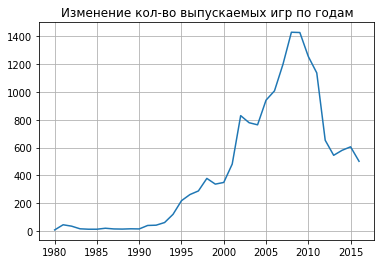

In [34]:
plt.title('Изменение кол-во выпускаемых игр по годам')
plt.plot(games_df['year_of_release'].value_counts().sort_index())
plt.grid()

Вернемся к главной задачи данного проекта - Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Необходимо учитывать современные тенденции, а не просто общий рост популярности персональных компьютеров, поэтому нам не нужны будут данные по всем годам, достаточно будет уловить тенденцию за последние 5 лет. (начиная с 2012 года)

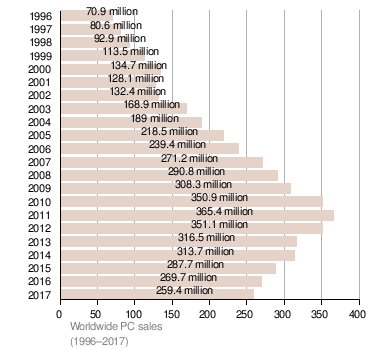
График отображающий спрос на ПК

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Как думаешь, чем вызван спад в индустрии последних лет?

</div>

<div class="alert alert-block alert-info">
<font size="2"><b>Ответ на комментарий ревьюера</b></font>
    
Предполагаю, что спад вызван популярностью смартфонов и мобильных игр. 
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Вполне реальная причина спада в индустрии. 

</div>

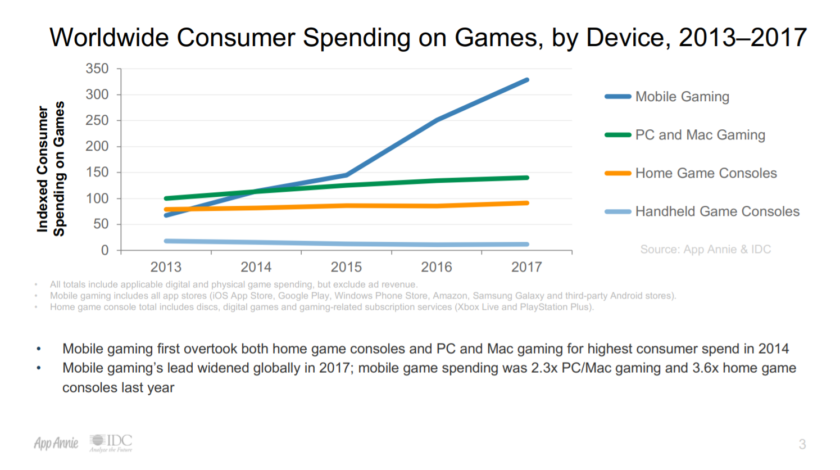

## Изменение продаж по платформам 

Необходимо выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Найти популярные в прошлом платформы, у которых сейчас продажи на нуле. За какой характерный период появляются новые и исчезают старые платформы?

In [35]:
# Посчитаем для каждой платформы суммарные продажи
the_most_salered_platform = (
    games_df.groupby(by='platform')['all_sales']
    .sum()
    .sort_values(ascending=False)
)#['all_sales'],ascending=False)()

In [36]:
the_most_salered_platform

platform
PS2     1247.28
X360     961.30
PS3      931.34
Wii      891.18
DS       802.79
PS       727.58
PS4      314.14
GBA      312.88
PSP      290.34
3DS      257.81
PC       256.11
GB       254.43
XB       252.66
NES      251.05
N64      218.01
SNES     200.04
GC       197.03
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_sales, dtype: float64

In [37]:
print("Топ-5 платформ с наибольшими суммарными продажами по всем годам: \n{}"
    .format(list(the_most_salered_platform[:5].index))
)
print("Топ-5 платформ с наименьшими суммарными продажами по всем годам: \n{}"
    .format(list(the_most_salered_platform[-5:].index))
)

Топ-5 платформ с наибольшими суммарными продажами по всем годам: 
['PS2', 'X360', 'PS3', 'Wii', 'DS']
Топ-5 платформ с наименьшими суммарными продажами по всем годам: 
['WS', 'TG16', '3DO', 'GG', 'PCFX']


In [38]:
def distribution_of_years(platform_name):
    """
    функция для построения распределения по годам 
    
    """
    df = games_df.query('platform == @platform_name')
    max_, min_ = df['year_of_release'].max(), df['year_of_release'].min()
    #print(max_, min_)
    #df.hist('year_of_release', range=(min_, max_))
    plt.figure()
    df['year_of_release'].plot(kind='hist', range=(min_, max_), title = platform_name, grid=True)
    #games_df.query('platform == @platform_name').groupby(by='year_of_release')['all_sales'].sum()

In [39]:
def sales_of_years(platform_name, df_input=games_df):
    """
    функция для построения суммы продаж по годам 

    """
    df = df_input.query('platform == @platform_name')
    df.groupby(by='year_of_release')['all_sales'].sum().plot(
        x='year_of_release',y='all_sales', grid=True, label=platform_name
               )

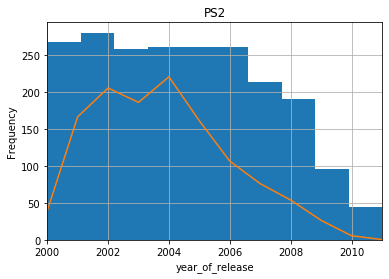

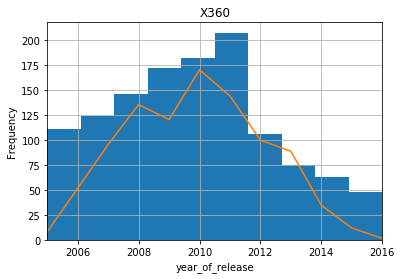

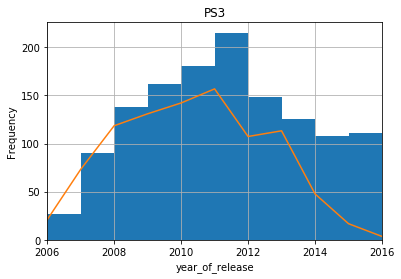

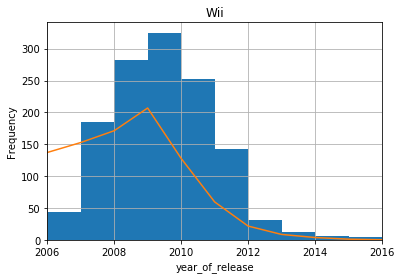

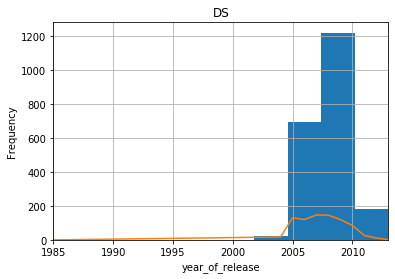

In [40]:
# построим гистрограммы для популярных платформ по годам
for platform_name in the_most_salered_platform.index[0:5]:
    distribution_of_years(platform_name)
    #интересно просто посмотреть тренд продаж, 
    #поэтому нанесем на гистограммы суммарную сумму по прадажам по годам
    sales_of_years(platform_name)

Заметим, что у платфомры DS длинный хвост слева, возможно, это выбросы, а возможно, просто малые продажи до 2005 года.
Googl говорит о том, что платформа DS была выпущена 2004-2005 году, поэтому это выбросы, проанализируем их.

In [41]:
games_df.query('platform =="DS" & year_of_release<2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15721,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [42]:
#удалим данный выброс
games_df = games_df.drop(games_df.query('platform =="DS" & year_of_release<2004').index)
games_df = games_df.reset_index()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Верное наблюдение. Лучше убрать такое значение, т.к. 1 такой выброс может исказить расчеты среднего периода жизни. 

</div>

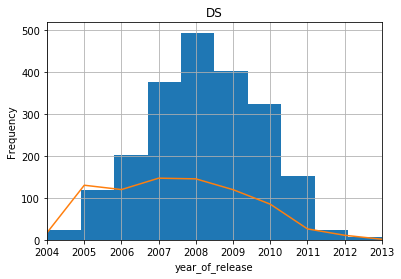

In [43]:
# построим гистрограммы для платформы DS (без выброса)
distribution_of_years("DS")
sales_of_years('DS', games_df)

In [44]:
# популярные в прошлом платформы - примем те, которые имели суммарные продажи > 300,
# но последние 3 года (после 2013) имели нулевые продажи

def get_list_old_popular(year_limit=2013, all_sales_limit=300):
    """
    функция для определения популярных в прошлом платформ,
    а последние 3 года не продававшихся
    """
    df = games_df.groupby(by='platform')['all_sales'].sum()
    df = df[df>all_sales_limit]
    old_popular = []
    for platform_name in df.index:
        if games_df.query('platform == @platform_name')['year_of_release'].max() <= 2013:
            old_popular.append(platform_name)
    return old_popular

In [45]:
#получим список платформ, которые были популярны в прошлом, а сейачс продажи на нуле:
old_popular_platform_name = get_list_old_popular()

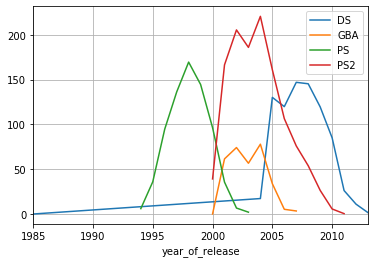

In [46]:
# построим графики продаж по годам для популярных в прошлом платформ
for i in old_popular_platform_name:
    sales_of_years(i)
    plt.legend()

По проведенному анализу можно предположить, что характерный период популярности платформы - от 5 до 10 лет. Каждые 5 лет появляется/сменяется популярная платформа.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Значение средней продолжительности существования платформы приведено. Однако выводы ты делаешь по графикам. Стоит также привести расчет данного значения. Подумай, стоит ли включать в расчет все платформы. Будут ли выбросы по продолжительности существования платформ?

</div>

<div class="alert alert-block alert-info">
<font size="2"><b>Ответ на комментарий ревьюера</b></font> 
Слишом приблеженные выводы делаю по графикам.... Ниже произведен численный расчет продолжительности существования платформы, считаю нужным исключить выбросы: 
    
- Платформы, для которых в нашем датасете <= 10 игр.
до 10 игр для одной платформы - слишком велика вероятность, что не все года популярности платформы будут охвачены, наша выборка содержит не все игр для таких платформ.
- Не учитывать данные по платформе PC, так как продолжительность существования PC значительно превосходит др. 
                                                   
</div>

In [47]:
# расчет средней продолжительности существования платформы
platfor_min_max = games_df.groupby(by='platform')['year_of_release'].agg(['min', 'max'])
platforms_period_of_live = platfor_min_max.copy(deep=True)
platforms_period_of_live['period'] = platforms_period_of_live['max'] - platforms_period_of_live['min']

In [48]:
k = games_df.groupby(by='platform')['name'].count()
k = k.drop('PC')

In [49]:
print("Средняя продолжительность существования платформы:{:.0f}"
      .format(platforms_period_of_live.loc[k[k>10].index]['period'].mean()))

Средняя продолжительность существования платформы:8


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Отлично, расчет приведен. Однако не стоило в анализ включать актуальные на настоящий момент платформы. Период их жизни еще продолжается.

</div>

## Данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году?


В дано было указано, что данные за 2016 год не полные, поэтому при построении частоты продаж по годам для платформ (например для PS2) был замечен спад в районе 2016 года. Это скажется на дальнейшем анализе данных, поэтому необходимо выделить корректный интервал для дальнейшего исследований. 

In [50]:
# Посмотрим сколько значений для каждого года
games_df['year_of_release'].value_counts().sort_index(ascending=False)

2016     502
2015     606
2014     581
2013     545
2012     653
2011    1137
2010    1255
2009    1427
2008    1429
2007    1198
2006    1008
2005     941
2004     764
2003     779
2002     830
2001     482
2000     350
1999     338
1998     379
1997     289
1996     263
1995     219
1994     121
1993      62
1992      43
1991      41
1990      16
1989      17
1988      15
1987      16
1986      21
1985      13
1984      14
1983      17
1982      36
1981      46
1980       9
Name: year_of_release, dtype: int64

Как было сказано ранее, нам важно уловить тенденцию прошлых лет, чтобы рекламщики могли сплонировать кампанию, релевантую последним годам. Так же необходимо сгладить неполноту данных за 2016 год. Далее будут учитываться данные только начиная с 2012 года, так как кол-во продаж по 2012-2016 лежат в достаточно "узком" интервале [500, 660]

In [51]:
# все дальнейшие расчеты будут проводиться со следующими данными
games_df_important = games_df.query('year_of_release >= 2012')
print(len(games_df_important))

2887


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Актуальный период назван. Так в рассмотрение попадут только последние поколения платформ, а также будем рассматривать только конечный на данный момент интервал развития игровой индустрии. 

</div>

In [52]:
# выделим платформы-лиды по прадажам для периода 2012-2016 год
sales_rating = (
    games_df_important.groupby(by='platform')['all_sales']
    .sum()
    .sort_values(ascending=False)
)

In [53]:
print('ТОП-5 платформ-лидеров по продажам за 2012-2016 год:\n', sales_rating[:5])

ТОП-5 платформ-лидеров по продажам за 2012-2016 год:
 platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
Name: all_sales, dtype: float64


## Определение роста, падения для платформ-лидиров по продажам. Выбор нескольких потенциально прибыльных платформ.

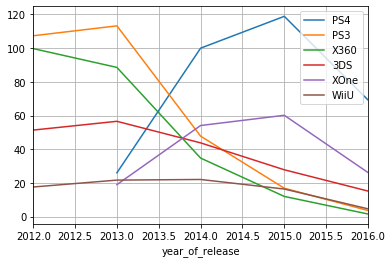

In [54]:
for i in sales_rating.index[:6]:
    sales_of_years(i, games_df_important)
    plt.legend()

Заметим, что все выделенные на предыдущем шаге платформы уменьшаются по сумме продаж. Хотя PS3 и X360 были наиболее прибыльные в 2013 году, на 2016 год продажи стремительно уменьшаются. \
PS4, XOne, 3DS, WiiU так же уменьшают сумму продаж, но на 2016 год сумма по прадажам у данных платформ выше, чем у PS3 и X360. На сумму продаж могли повлиять факторы не связанные с конкретными интересами пользователе, а, возможно, люди в целом стали меньше тратить на компьютерные игры, поэтому необходимо смотреть относительную оценку. \

По результатам построения графика зависимости суммарных продаж от года, выбраны потенциально прибыльные платформы:
PS4, XOne, 3DS, WiiU


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Да, именно эти платформы мы и можем назвать перспективными на 2017 год. 

</div>

## Построение графика «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам

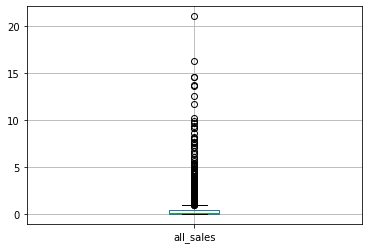

In [55]:
#построение "ящика с усами" по глобальным продажам по группировке по каждой игре
games_df_important.boxplot(column=['all_sales'])

In [56]:
games_df_important['all_sales'].describe()

count    2887.000000
mean        0.501171
std         1.248944
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: all_sales, dtype: float64

In [57]:
print('Медианное значение глобальных продаж по играм: {}'
      .format(games_df_important['all_sales'].median()))

Медианное значение глобальных продаж по играм: 0.12000000000000001


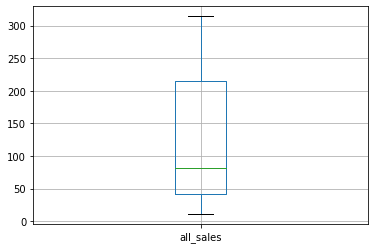

In [58]:
#построение "ящика с усами" по глобальным продажам по платформам
games_df_important.groupby('platform').sum().boxplot(column=['all_sales'])

In [59]:
# повторим информацию с диаграммы, только в текстовом виде
games_df_important.groupby('platform').sum()['all_sales'].describe()

count     11.000000
mean     131.534545
std      112.094875
min       11.190000
25%       42.275000
50%       82.190000
75%      215.575000
max      314.140000
Name: all_sales, dtype: float64

In [60]:
print('Медианное значение глобальных продаж по платформам: {}'
      .format(games_df_important.groupby('platform').sum()['all_sales'].median()))

Медианное значение глобальных продаж по платформам: 82.19


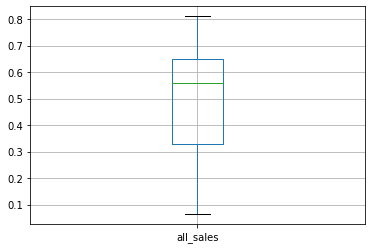

In [61]:
#построение "ящика с усами" по глобальным продажам по средним продажам по платформам
games_df_important.groupby('platform').mean().boxplot(column=['all_sales'])

In [62]:
games_df_important.groupby('platform').mean()['all_sales'].describe()

count    11.000000
mean      0.489816
std       0.254368
min       0.064682
25%       0.327917
50%       0.559116
75%       0.650010
max       0.810068
Name: all_sales, dtype: float64

Вывод: исходя из СКО, имеем малую разницу в глобальных продажах между играми, хотя есть выделяющиеся дорогие игры (выделенные на диаграмме как выбросы). Большая разница в суммарных глобальных продажах по платформам.
Интересно, что средние значения продаж по платформам имеют небольшой разброс, так как разброс между глобальными продажами по играм малый. 

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Диаграммы размаха нас просят построить для всех платформ актуального периода. Данные, которые мы используем при построении - общая выручка с каждой игры, проданной на данной платформе. Т.е. группировать данные по названию игры или платформе не стоит. 

</div>

<div class="alert alert-block alert-info">
<font size="2"><b>Правки_1</b></font> 

Ниже привела скорректированные диаграммы
    
- Для платформ PS3, PS4, XOne, 3DS, WiiU, DS, X360 получен сравнительно большой размах значений (std > 1), это означает, что для данных платформ приведено достаточное кол-во игр с большими и малыми продажами; 
- Для платформ PC, PSV, PSP получен меньших размах (std < 0.5), что говорит о том, что все игры близки по продажам;
-
</div>

In [63]:
def print_boxplot(df, platform_name):
    """
    для построения диаграммы размаха для платформы
    по общей выручке с каждой игры, проданной на даной платформе
    
    на входе:
    df - DataFrame
    platform_name - наименование платформы
    """
    df.query('platform == @i').plot(
        x='year_of_release',y='all_sales', grid=True, label=platform_name,kind='box'
               )
    
    print('Описание размаха для платформы {}:'.format(platform_name),
          df.query('platform == @i')['all_sales'].describe())

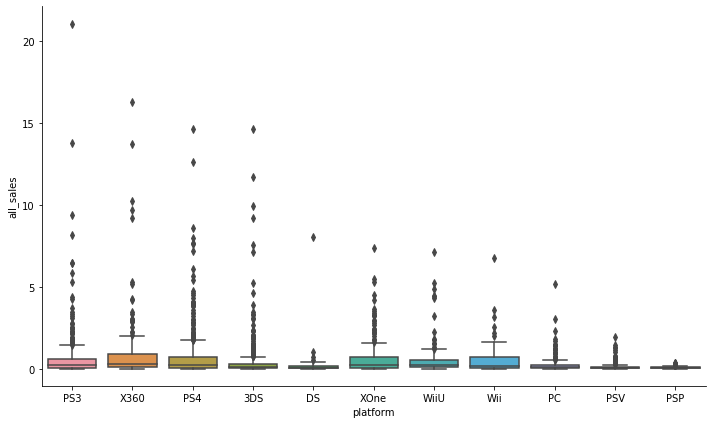

In [64]:
# построение диаграмм размаха на одном графике
# с помощью библиотеки seaborn
sns.catplot(x='platform',y='all_sales', data=games_df_important, kind="box", height=6, aspect=10/6)

Описание размаха для платформы PS3: count    493.000000
mean       0.585781
std        1.462855
min        0.010000
25%        0.050000
50%        0.200000
75%        0.610000
max       21.050000
Name: all_sales, dtype: float64
Описание размаха для платформы X360: count    292.000000
mean       0.810068
std        1.712069
min        0.010000
25%        0.100000
50%        0.310000
75%        0.870000
max       16.270000
Name: all_sales, dtype: float64
Описание размаха для платформы PS4: count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: all_sales, dtype: float64
Описание размаха для платформы 3DS: count    396.000000
mean       0.491439
std        1.387161
min        0.010000
25%        0.040000
50%        0.110000
75%        0.312500
max       14.600000
Name: all_sales, dtype: float64
Описание размаха для платформы DS: count    31.000000
mean      0.404839
std       1.43

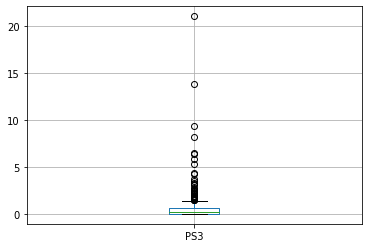

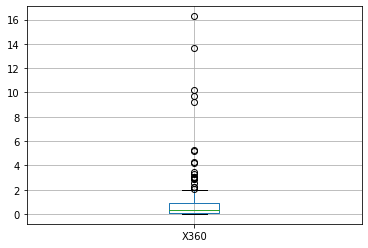

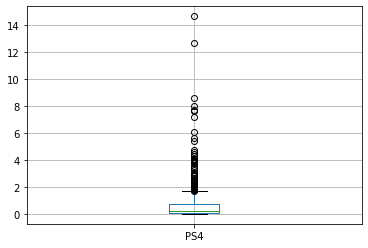

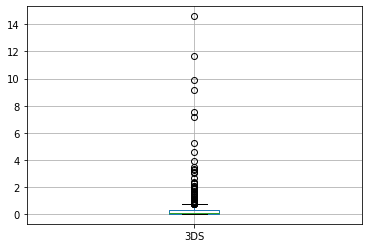

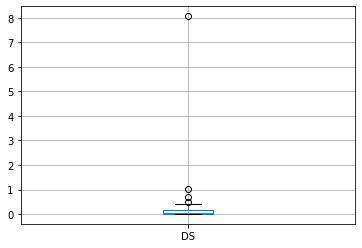

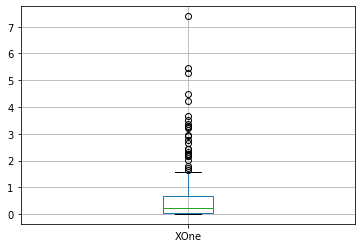

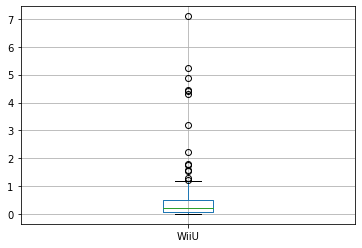

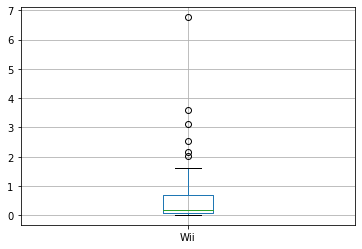

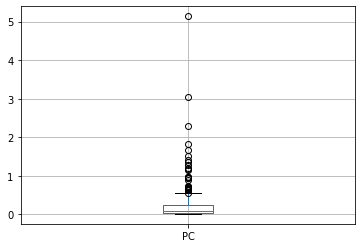

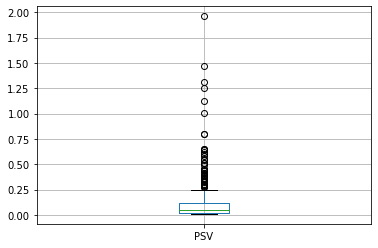

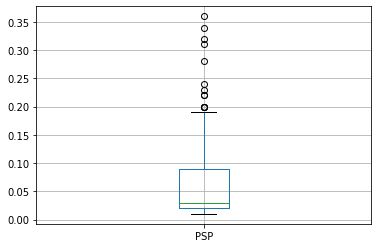

In [65]:
# расчет и построение по отдельности для каждой платформы
for i in games_df_important['platform'].unique():
    print_boxplot(games_df_important, i)

<div class="alert alert-block alert-info">
    
Действительно, графики с библиотекой seaborn выглядят презентабельнее. Огромное спасибо за совет!
Буду использовать в новых проектах.
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>
 
Да, именно такие графики нас и нужны. Подумай, из-за чего формируется разница между платформами. Старайся не только описывать результат, но и трактовать его. 

</div>

## Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построение диаграммы рассеяния и рассчет корреляции между отзывами и продажами

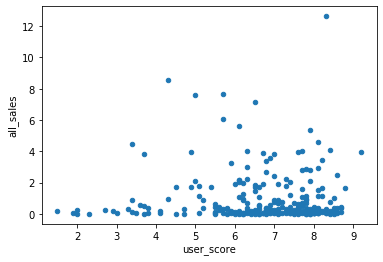

In [66]:
# построим диграмму рассеяния по отзывам пользвателей и продажам
df_PS4 = games_df_important.query('platform == "PS4"').sort_values(by='user_score')
df_PS4.plot('user_score', 'all_sales', kind='scatter') 

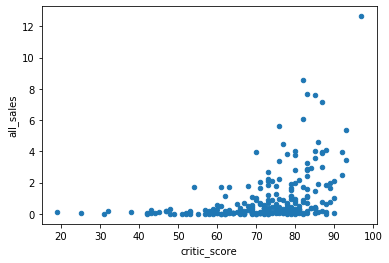

In [67]:
# построим диграмму рассеяния по отзывам критиков и продажам
df_PS4 = games_df_important.query('platform == "PS4"').sort_values(by='user_score')
df_PS4.plot('critic_score', 'all_sales', kind='scatter') 

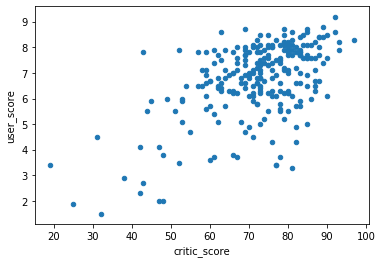

In [68]:
# Выбрана популярная платформа - PS4 (исходя из суммарных продаж)
df_PS4 = games_df_important.query('platform == "PS4"')
df_PS4.plot(x='critic_score', y='user_score', kind='scatter') 

In [69]:
print('Корреляция между оценкой критикой и продажами:',
      df_PS4['critic_score'].corr(df_PS4['all_sales']))
      
print('Корреляция между оценкой пользователей и продажами:', 
      df_PS4['user_score'].corr(df_PS4['all_sales']))

Корреляция между оценкой критикой и продажами: 0.40656790206178095
Корреляция между оценкой пользователей и продажами: -0.027427851974847168


Рассмотрена популярная платформа PS4:
- при построении диаграммы рассеяния оценки критиков и оценки пользователей явная зависимость не установлена, хотя заметно более плотное скопление точек на линии x = y,
- Корреляция между оценкой пользователей и продажами получилось неожиданно слабой (еще и отрицательной), то есть связь между оценкой пользователей и продажами не установлена (ее нет либо она носит более сложный, не линейный характер).
- Корреляция между оценкой критиков и продажами оказалось слабой, но при этом положительная связь имеет место быть. При более высокой оценки критиков продажи так же растут. 

Предполагаем, что и остальные платформы имееют похожую тенденцию.


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Результат получен. Подумай, чем он вызван. Стоит рассмотреть и другие актуальные платформы. Делать выводы лишь по одной из них мы не можем. 

</div>

<div class="alert alert-block alert-info">
<font size="2"><b>Правки_1</b></font> 

Рассмотрим влияние отзывов пользователей и экспертов для популярных платформ PS4, XOne, 3DS, WiiU, PS3. Ниже приведены расчеты и графики. 
Сделаны дополнительные выводы: 
- интересно, что для платформ PS4, XOne, PS3 характерна более высокая корреляция между оценкой критиков и продажами, чем между оценкой пользователей и продажами. То есть покупатели при выбирают игры для данных платформ больше опираясь на мнение экспертов, чем других пользователей.
- для других платформ, таких как 3DS, WiiU, характерна схожая корреляция между оценкой критиков и продажами и оценкой пользователей и продажами. То есть близка вероятность, что потребитель будет выбирать игру опираясь на мнение других пользователей и экспертов.
</div>

In [70]:
def plot_score(df, platform_name, score_name):
    """
    для расчета и вывода на экран диаграммы рассеяние 
    для определенной платформы
    
    df - входной DataFrame
    platform_name - название платформы
    score_name - user_score/critic_score
    
    """
    # построим диграмму рассеяния по отзывам пользвателей и продажам
    df_platform = df.query('platform == @platform_name').sort_values(by=score_name)
    df_platform.plot(score_name, 'all_sales', kind='scatter', title=platform_name+' '+score_name)
    
def print_corr(df, platform_name):
    
    """
    для расчета и вывода на экран корреляции для платформы
    1. между оценкой критиков и продажами
    2. между оценкой пользователей и продажами
    df - входной DataFrame
    platform_name - название платформы
    
    """
    df_platform = df.query('platform == @platform_name')
    print('Корреляция между оценкой критиков и продажами {}:'.format(platform_name),
      df_platform['critic_score'].corr(df_platform['all_sales']))
      
    print('Корреляция между оценкой пользователей и продажами по платформе {}:'.format(platform_name), 
      df_platform['user_score'].corr(df_platform['all_sales']))


Корреляция между оценкой критиков и продажами PS4: 0.40656790206178095
Корреляция между оценкой пользователей и продажами по платформе PS4: -0.027427851974847168
Корреляция между оценкой критиков и продажами XOne: 0.4169983280084017
Корреляция между оценкой пользователей и продажами по платформе XOne: -0.07050537515177652
Корреляция между оценкой критиков и продажами 3DS: 0.3208028695360785
Корреляция между оценкой пользователей и продажами по платформе 3DS: 0.200106979914758
Корреляция между оценкой критиков и продажами WiiU: 0.34837976012017485
Корреляция между оценкой пользователей и продажами по платформе WiiU: 0.39823032938591246
Корреляция между оценкой критиков и продажами PS3: 0.3314972592629587
Корреляция между оценкой пользователей и продажами по платформе PS3: -0.00898663740321868


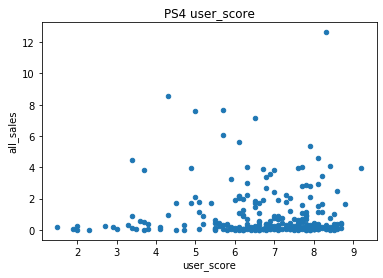

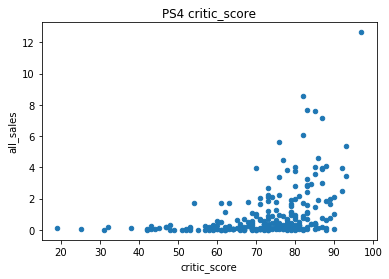

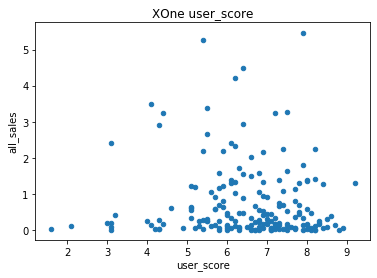

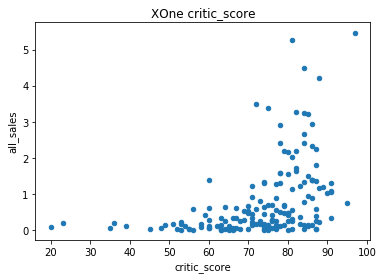

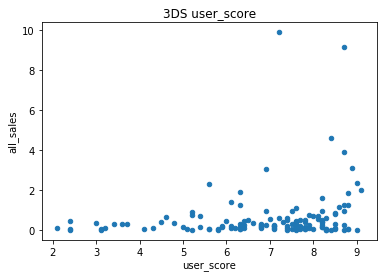

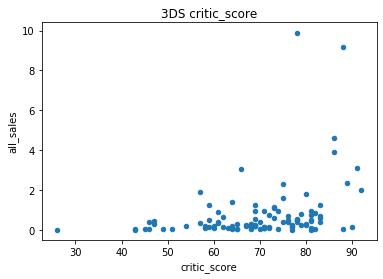

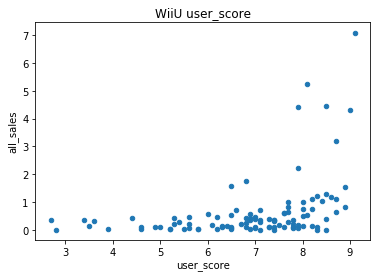

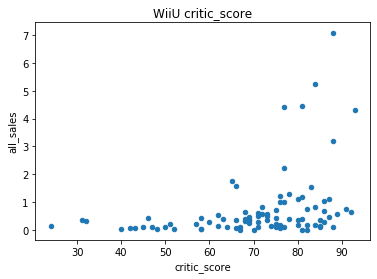

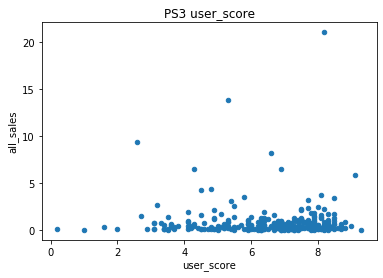

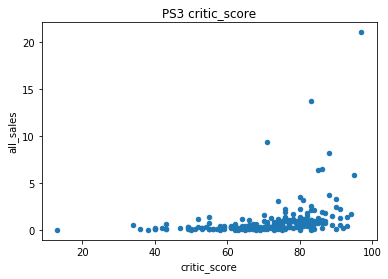

In [71]:
for platform_name in ['PS4', 'XOne', '3DS', 'WiiU', 'PS3']:
    plot_score(games_df_important, platform_name, 'user_score')
    plot_score(games_df_important, platform_name, 'critic_score')
    print_corr(games_df_important, platform_name)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Анализ данных платформ подтверждает ранее сделанные выводы. 

</div>

## Рассмотрение общего распределения игр по жанрам

In [72]:
# гистограмма оказалась не самым наглядным представленем распределения игр по жанрам
#games_df_important['genre'].hist(bins=7)

In [73]:
#группируем по жанрам и расчитываем кол-во игр и сумму глобальных продаж
group_of_genre = games_df_important.groupby(['genre'])['all_sales'].agg(['sum','count'])

In [74]:
sum_sales_genre = group_of_genre['sum'].sort_values(ascending=False)
print('Сумма глобальных продаж по жанрам')
sum_sales_genre

Сумма глобальных продаж по жанрам


genre
Action          441.47
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: sum, dtype: float64

In [75]:
count_sales_genre = group_of_genre['count'].sort_values(ascending=False)
print('Кол-во игр по жанрам')
count_sales_genre

Кол-во игр по жанрам


genre
Action          1032
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: count, dtype: int64

In [76]:
print('ТОП-5 частых жанров игр: ', list(count_sales_genre[:5].index))
print('ТОП-5 наименее частых жанров игр: ', list(count_sales_genre[-5:].index))

print('ТОП-5 по успешным продажам жанров: ', list(sum_sales_genre[:5].index))
print('ТОП-5 наименее успешных по продажам жанров: ', list(sum_sales_genre[-5:].index))

ТОП-5 частых жанров игр:  ['Action', 'Role-Playing', 'Adventure', 'Sports', 'Shooter']
ТОП-5 наименее частых жанров игр:  ['Fighting', 'Platform', 'Simulation', 'Strategy', 'Puzzle']
ТОП-5 по успешным продажам жанров:  ['Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc']
ТОП-5 наименее успешных по продажам жанров:  ['Fighting', 'Simulation', 'Adventure', 'Strategy', 'Puzzle']


Явно жанры с высокими и низкими продажами выделяются. При этом более высокие продажи у жанров, игр, которых большее кол-во. 

Порекомендовала бы коллегам сосредоточиться на играх популярных жанров:\
'Action', 'Role-Playing', 'Adventure', 'Sports', 'Shooter', 'Misc'

Наименее успешными по продажам жанры оказались:\
'Platform','Fighting', 'Simulation', 'Adventure', 'Strategy', 'Puzzle'

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Анализ популярности жанров проведен. Однако не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 

</div>

<b> Вывод по шагу 4 </b>:
1. Оказалось, что максимальное кол-во выпущенных игр пришлось на 2008 год, далее наблюдается спад. Нецелесообразно рассматривать данные до 2012 года для целей прогнозирования успехов игр и платформ. Поэтому было принято решение рассматривать только данные начиная с 2012 года.
2. Популярные платформы за все года - это 'PS2', 'X360', 'PS3', 'Wii', 'DS'. Платформы популярные в прошлом, но сейчас продажи на нуле - 'DS', 'GBA', 'PS', 'PS2'. В среднем сменяемость популярности платформ 5-10 лет.
3. Все популярные на данный момент платформы падают по продажам (PS4, PS3, X360, 3DS, XOne). Самая перспективная на 2016 год - PS4,так как она имеет больше всего продаж на 2016 год.
4. Разброс между суммарной стоимостью игр по разным платформам велик - СКО ~ 112. Но разброс между средними значениями по разным платформам и разброс по прадажам игр без группировок - небольшой. Значит следуюет сфокусироваться на выборе успешной платфомы.
5. Оценка критиков оказывает большее влияние на суммарные глобальные продажи, чем оценка пользователей.
6. Выявлены наиболее успешные жанры игр: 'Action', 'Role-Playing', 'Adventure', 'Sports', 'Shooter', 'Misc'.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Здорово, что ты не забываешь делать выводы по каждому разделу работы. 

</div>

<a id='step_5'></a>
# Шаг 5. Составление портрета пользователя каждого региона



Необходимо определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [77]:
def most_popular_platforms(df, region_name):
    """
    определение ТОП5 самых популярных и не популярных платформ
    по доле продаж. 
    На входе: название региона (строчные буквы) и выборка
    """
    popular_platform = df.groupby(['platform'])['{}_sales'.format(region_name)].sum()

    popular_platform = (popular_platform/popular_platform.sum()).sort_values(ascending=False)
    print("Платформа {}. Рейтинг платформ по доле продаж:".format(region_name.upper()))
    print(popular_platform)
    
    #poplar_platform.plot.pie(y='all_sale', figsize=(7, 7))
    
    print('ТОП-5 популярных платформ по продажам в регионе "{}"'.format(region_name),
          list(popular_platform[:5].index))
    #print('ТОП-5 наименее популярных платформ по продажам в регионе "{}"'.format(region_name),
    #      list(popular_platform[-5:].index))

    
    
def print_platforms(df, region_name):
    """
    вывод на экран круговых диаграмма по платформам
    по доле продаж. 
    На входе: название региона (строчные буквы) и выборка
    """
    popular_platform = df.groupby(['platform'])['{}_sales'.format(region_name)].sum()
    popular_platform = (popular_platform/popular_platform.sum()).sort_values(ascending=False)

    
    # построим круговую диаграмму
    index_ = list(popular_platform.index)
    index_[-3:] = ['Others']*3 #:{}'.format(index_[-3:])]*3
    popular_platform.index = index_ 
    popular_platform = popular_platform.groupby(popular_platform.index).sum()

    labels = popular_platform.index
    
    explode = [0.02]*len(popular_platform)
    plt.figure(figsize=(6,6))
    plt.title('Доля продаж потформам для региона '+region_name.upper())
    plt.pie(popular_platform, labels=labels, autopct='%.0f%%', pctdistance=0.8,
        shadow=True, startangle=90)

In [78]:
def most_popular_genres(df, region_name):
    """
    определение ТОП5 самых популярных и не популярных жанров
    по доле продаж. 
    На входе: название региона (строчные буквы) и выборка
    """
    popular_platform = df.groupby(['genre'])['{}_sales'.format(region_name)].sum()

    popular_platform = (popular_platform/popular_platform.sum()).sort_values(ascending=False)
    print("Платформа {}. Рейтинг жанров по доле продаж:".format(region_name.upper()))
    print(popular_platform)
    
    print('ТОП-5 популярных жанров по продажам в регионе "{}"'.format(region_name),
          list(popular_platform[:5].index))
    #print('ТОП-5 наименее популярных жанров по продажам в регионе "{}"'.format(region_name),
    #      list(popular_platform[-5:].index))
    
    
def print_genres(df, region_name):
    """
    вывод на экран круговых диаграмма по жанрам
    по доле продаж. 
    На входе: название региона (строчные буквы) и выборка
    """
    popular_platform = df.groupby(['genre'])['{}_sales'.format(region_name)].sum()
    popular_platform = (popular_platform/popular_platform.sum()).sort_values(ascending=False)

    
    # построим круговую диаграмму
    index_ = list(popular_platform.index)
    index_[-3:] = ['Others']*3 #:{}'.format(index_[-3:])]*3
    popular_platform.index = index_ 
    popular_platform = popular_platform.groupby(popular_platform.index).sum()

    labels = popular_platform.index
    
    explode = [0.02]*len(popular_platform)
    plt.figure(figsize=(6,6))
    plt.title('Доля продаж по жанрам для региона '+region_name.upper())
    plt.pie(popular_platform, labels=labels, autopct='%.0f%%', pctdistance=0.8,
        shadow=True, startangle=90)


In [79]:
def rating_ESRB(df_or, region_name):
    """
    определение ТОП5 самых популярных и не популярных игр определенной рейтинговой оценки ESRB
    по доле продаж. 
    На входе: название региона (строчные буквы) и выборка
    """
    # обработка пропусков
    df = df_or.copy(deep=True)
    df.loc[df['year_of_release']==2016]= df.query('year_of_release==2016').fillna('RP')
    df = df.fillna('E')
    
    popular_platform = df.groupby(['rating'])['{}_sales'.format(region_name)].sum()
    popular_platform = (popular_platform/popular_platform.sum()).sort_values(ascending=False)
    print("Платформа {}. ESRB по доле продаж:".format(region_name.upper()))
    print(popular_platform)
    
    print('ТОП-5 популярных типов ESRB по продажам в регионе "{}"'.format(region_name),
          list(popular_platform[:2].index))
    #print('ТОП-5 наименее популярных типов ESRB по продажам в регионе "{}"'.format(region_name),
    #      list(popular_platform[-2:].index))

    
def print_rating_ESRB(df_or, region_name):
    """
    вывод на экран круговых диаграмма по рейтинговой оценки ESRB
    по доле продаж. 
    На входе: название региона (строчные буквы) и выборка
    """

    # обработка пропусков
    df = df_or.copy(deep=True)
    df.loc[df['year_of_release']==2016]= df.query('year_of_release==2016').fillna('RP')
    df = df.fillna('E')
    
    
    popular_platform = df.groupby(['rating'])['{}_sales'.format(region_name)].sum()
    popular_platform = (popular_platform/popular_platform.sum()).sort_values(ascending=False)

    
    # построим круговую диаграмму
    index_ = list(popular_platform.index)
    #index_[-3:] = ['Others']*3 #:{}'.format(index_[-3:])]*3
    popular_platform.index = index_ 
    popular_platform = popular_platform.groupby(popular_platform.index).sum()

    labels = popular_platform.index
    
    explode = [0.02]*len(popular_platform)
    plt.figure(figsize=(6,6))
    plt.title('Доля продаж по ESRB для региона '+region_name.upper())
    plt.pie(popular_platform, labels=labels, autopct='%.0f%%', pctdistance=0.8,
        shadow=True, startangle=90)

In [80]:
# проходимся по всем регионам и определяем для каждого:
# - cамые популярные платформы (топ-5)(в долях продаж)
# - cамые популярные жанры (топ-5). (в долях продаж)
# - самые популярные оценки по рейтингу ESRB (в долях продаж)
for i in ['na', 'eu', 'jp']:
    most_popular_platforms(games_df_important, i)
    most_popular_genres(games_df_important, i)
    rating_ESRB(games_df_important, i)
    print('--------------------------------\n')

Платформа NA. Рейтинг платформ по доле продаж:
platform
X360    0.236959
PS4     0.183984
PS3     0.174915
XOne    0.157555
3DS     0.093582
WiiU    0.064464
PC      0.032452
Wii     0.029525
PSV     0.018578
DS      0.007766
PSP     0.000220
Name: na_sales, dtype: float64
ТОП-5 популярных платформ по продажам в регионе "na" ['X360', 'PS4', 'PS3', 'XOne', '3DS']
Платформа NA. Рейтинг жанров по доле продаж:
genre
Action          0.301000
Shooter         0.244945
Sports          0.137946
Role-Playing    0.108286
Misc            0.064616
Platform        0.042942
Fighting        0.033484
Racing          0.029136
Adventure       0.015092
Simulation      0.013485
Strategy        0.007157
Puzzle          0.001912
Name: na_sales, dtype: float64
ТОП-5 популярных жанров по продажам в регионе "na" ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']
Платформа NA. ESRB по доле продаж:
rating
M       0.391909
E       0.353874
E10+    0.128081
T       0.111703
RP      0.014432
Name: na_sales, dty

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Обрати внимание - ты не учитываешь игры без рейтинга. В результате огромная часть игр просто выпадает из анализа. Найди способ учесть их при группировке значений по рейтингу.
    
</div>

<div class="alert alert-block alert-info">
<font size="2"><b>Правки_1</b></font> 
    
Варианты учесть игры без рейтинга:
1. заменить пропуски на «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу;
2. попробовать найти закономерность в пропусках, возможно на этапе предобработки данных пропуски были отнесены к случайным по ошибке;
3. попробовать обогатить данные с сайта организации https://www.esrb.org/
4. обозначить все Nan к группе  «M» («Mature») — «Для взрослых» или «E» («Everyone») — «Для всех», но в таком случае, я вмешиваюсь в выборку, искажая ее. 

Комментарии по предложенным вариантам:
    
1. Нам не даст эта замена какой-то доп. информации. Так же некоторым играм уже присвоен рейтинг.
2. Могу только выделить, что большинство игр, которые я искала вручную на сайте ESRB чаще имеют рейтинг M, E
3. Не нашла возможность выгрузки на сайте рейтинга по всем играм. HTML запрос пока не стала делать
4. Кажется, что данные будут искажены. Но по отчетам ассоциации ESRB за разные годы (смотрела 2012-2018), каждый год больше всего игр приходится на категорию «E» («Everyone») — «Для всех».
    
    
Приняла следующее решение:
- Игры за за 2016 год с пропусками обозначить как RP - так как данные получены в 2016 году, так как, данные по рейтенгу еще устанавливались
- Другие пропуски заменить E - это будет как усреднение качественного показателя. То есть заменим значением, которые наиболее вероятно в генеральной совокупности. 

Коррективы внесены в соотвествующие функции выше.
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Ок, логику понял. Лучше все же было бы отметить пропуски значением "Нет рейтинга" и посмотреть на распределение продаж данной группы. 

</div>

In [81]:
#games_df_important[games_df_important['rating'].isna()]#.query('year_of_release==2016')

# ознакомимся с данными,где есть пропуски в рейтинге 
games_df_important[games_df_important['rating'].isna()].sample(10)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
14989,14989,To Love-Ru Trouble: Darkness - True Princess,PSV,2015,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
14911,14911,Blade Arcus from Shining EX,PS3,2015,Fighting,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
14605,14605,Eureka Seven AO: Jungfrau no Hanabanatachi,PS3,2012,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
10626,10626,Digimon World: Next Order,PSV,2016,Action,0.00,0.00,0.10,0.00,NaN,NaN,NaN,0.10
3604,3604,LEGO Dimensions,PS3,2015,Action,0.17,0.30,0.00,0.09,NaN,6.4,NaN,0.56
15366,15366,Ratchet & Clank Collection,PSV,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
13557,13557,Shiren the Wanderer 4 - God's Eye and the Demo...,PSP,2012,Role-Playing,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04
15973,15974,DoDonPachi Saidaioujou,X360,2013,Shooter,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
14520,14520,Onechanbara Z Kagura,X360,2012,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
12348,12348,Rurouni Kenshin: Meiji Kenyaku Romantan - Kansen,PSP,2012,Action,0.00,0.00,0.06,0.00,NaN,NaN,NaN,0.06


Проверила рейтинг некоторых игр вручную, например: 

Book of Spells - E, E10\
Natalie Brooks: Mystery at Hillcrest High - E, E10\
Etrian Odyssey IV: Legends of the Titans, 12-Sai. Koisuru Diary, -  E, E10\
Metro: Last Light, Chaos;Child	- M\
Dragon Quest Monsters Joker - E10\
Disney Infinity 3.0 - E10\
Rise of the Tomb Raider - M \
Dishonored	- M\
Samurai Warriors Chronicles 2nd - Т

<b>Вывод по шагу 5</b>

Проведя анализ по популярным платформам и популярным жанрам сделаны следующие выводы:
- Рейтинги продаж по жанрам и по платформам в Северной Америке и в Европе схожи:
    - самые популярные жанры: 'Action', 'Shooter', 'Sports', 'Role-Playing'
    - самые поплуярные платформы: 'PS4', 'PS3', 'X360', 'XOne', '3DS'
- В Японии портет покупателя отличается. Самой популярной платформой по продажам в Японии стала '3DS' (это японская платформа, именно поеэтому она и стала популярной в этом стране и менее популярна в Северной Америке и в Европе)
    - самые популярные жанры в Японии: 'Role-Playing', 'Action', 'Misc', 'Simulation', 'Fighting'


Зная что:
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»

Сделаем вывод, что 
- в Северной Америке пользуются популярностью игры рейтингов "Для взрослых" и "Для всех"
- в Европе - так же как и в Америке популярны "Для взрослых" и "Для всех"
- в Японии -  «Для всех», «Подросткам»

Делаем вывод, что рейтин ESRB влияет на продажи в разных регионах

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Портрет типичного пользователя каждого из регионов получен. Стоит визуализировать все полученные таблицы. Крайне не хватает графиков в данном разделе работы. 

</div>

<div class="alert alert-block alert-info">
<font size="2"><b>Правки_1</b></font> 
    
Визуализируем (привела графики ниже) для каждого региона по доле продаж доли:
- платформ
- жанры
- рейтинг ESRB
    
    
 </div>

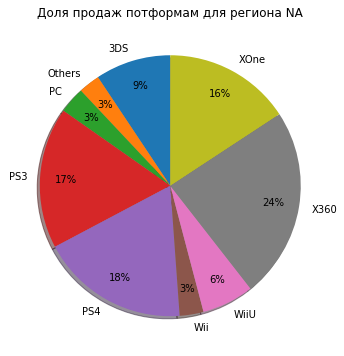

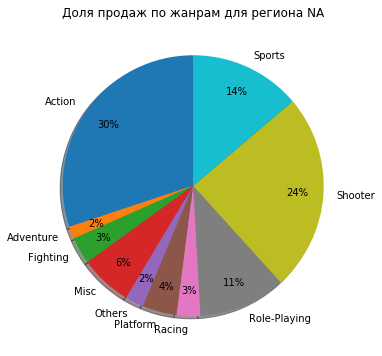

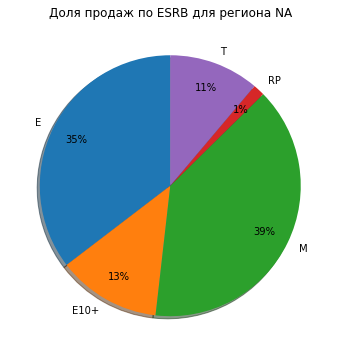

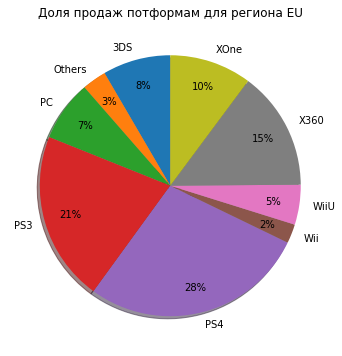

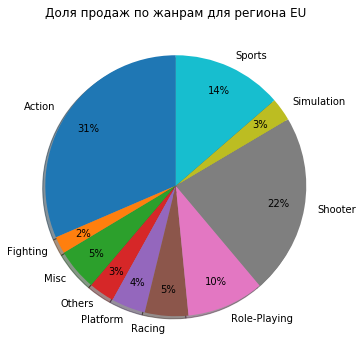

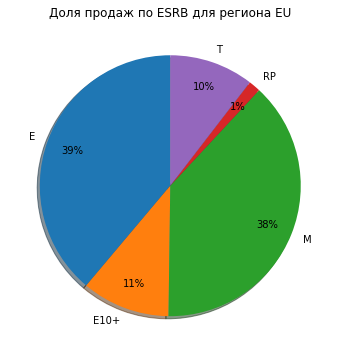

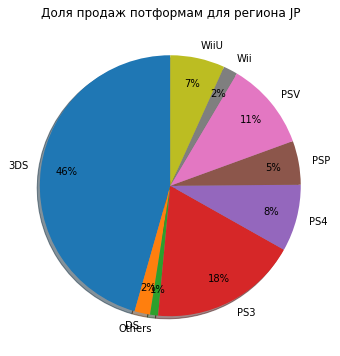

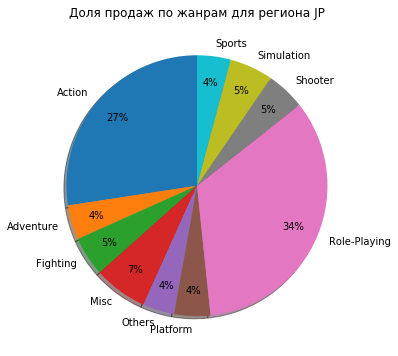

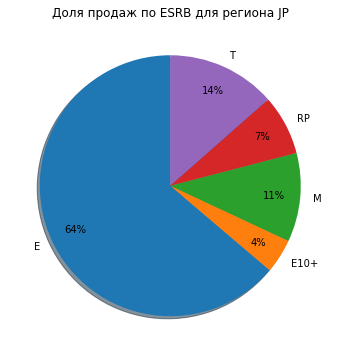

In [82]:
## проходимся по всем регионам и строим круговые диаграммы:
# - по платформам(в долях продаж)
# - по жанрам (топ-5). (в долях продаж)
# - по рейтингу ESRB (в долях продаж)
for i in ['na', 'eu', 'jp']:
    print_platforms(games_df_important, i)
    print_genres(games_df_important, i)
    print_rating_ESRB(games_df_important, i)

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера 2</b></font>
 
Не советую использовать пироговые диаграммы (pie-charts). Такая диаграмма затрудняет понимание, особенно если сегментов будет больше 4х. Также, на этом типе диаграмм сложно визуально увидеть разницу между сегментами. Рекомендую использовать обычные столбчатые диаграммы вместо пироговых диаграмм. 

</div>

<a id='step_6'></a>
# Шаг 6. Проведение исследования статистических показателей

Необходимо ответить на вопрос: 
Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? 
- Посчитать среднее количество, дисперсию и стандартное отклонение. 
- Построить гистограммы. Описать распределения

In [83]:
games_df_important

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16450,16451,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16454,16455,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16457,16458,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16459,16460,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [84]:
# Расчет среднего, дисперсии, кол-ва, стандартнкого отклонения для каждого жанра
games_df_important.pivot_table(
    index='genre', values=['critic_score', 'user_score'], aggfunc={'mean','var', 'std', 'count'} )

critic_score                                   user_score  \
                    count       mean        std         var      count   
genre                                                                    
Action                437  71.411899  12.100104  146.412519        544   
Adventure              59  72.661017  11.000956  121.021040         78   
Fighting               64  70.406250  13.407791  179.768849         71   
Misc                   57  72.807018  10.054208  101.087093         75   
Platform               59  74.610169  13.713845  188.069550         67   
Puzzle                  9  75.444444   6.948221   48.277778         10   
Racing                 81  71.864198  12.543677  157.343827         88   
Role-Playing          161  73.049689  12.282509  150.860016        171   
Shooter               173  73.421965  12.445275  154.884864        198   
Simulation             39  66.615385  13.556151  183.769231         45   
Sports                143  72.895105  15.473154  239.418497        200   
Strategy               31  75.870968  12.515968  156.649462         35   

                                            
                  mean       std       var  
genre                                       
Action        6.807721  1.411781  1.993126  
Adventure     7.352564  1.412534  1.995253  
Fighting      6.884507  1.424144  2.028185  
Misc          6.940000  1.210651  1.465676  
Platform      6.750746  1.703150  2.900719  
Puzzle        7.740000  0.903327  0.816000  
Racing        6.198864  1.678498  2.817355  
Role-Playing  7.258480  1.278637  1.634913  
Shooter       6.410606  1.465591  2.147958  
Simulation    6.604444  1.801257  3.244525  
Sports        5.505500  1.760687  3.100020  
Strategy      6.420000  2.030908  4.124588

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Круто, что ты собрала все данные по жанрам в единую таблицу. Так нам заметно проще сравнивать их между собой. 

</div>

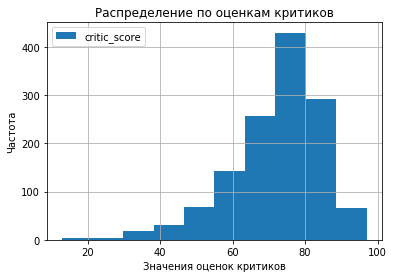

In [85]:
# постоение гистограммы по оценке критиков

ax = games_df_important.plot(y='critic_score', kind='hist', title='Распределение по оценкам критиков', grid=True)
ax.set_xlabel('Значения оценок критиков')
ax.set_ylabel('Частота')
plt.show()

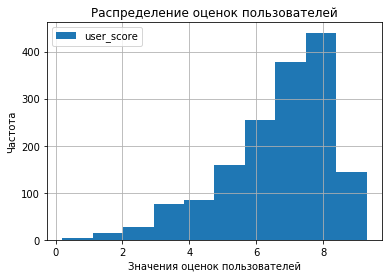

In [86]:
# построение гистограммы по оценке пользователей

ax = games_df_important.plot(y='user_score', kind='hist', title='Распределение оценок пользователей', grid=True)
ax.set_xlabel('Значения оценок пользователей')
ax.set_ylabel('Частота')
plt.show()

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

По каждому графику работы проверь подписи осей, а также названия рисунокв. Без этого порой сложно понять, что именно мы анализируем. 

</div>

<div class="alert alert-block alert-info">
<font size="2"><b>Внесены исправления</b></font> 

При построении графиков для быстроты считывании информации, необходимо подписывать оси и устанавливать заголовки. Внесены коррективы.

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Не забывай про данные важные элементы любого графика. 

</div>

По результатам построения гистограмм и в случае рассмотрения параметра "оценка критиков", а так же "оценка пользователей" наблюдаем скошенный набор данных в право (положительная скошенность). При увеличении кол-во данных, распределение будет стремиться к нормальному.

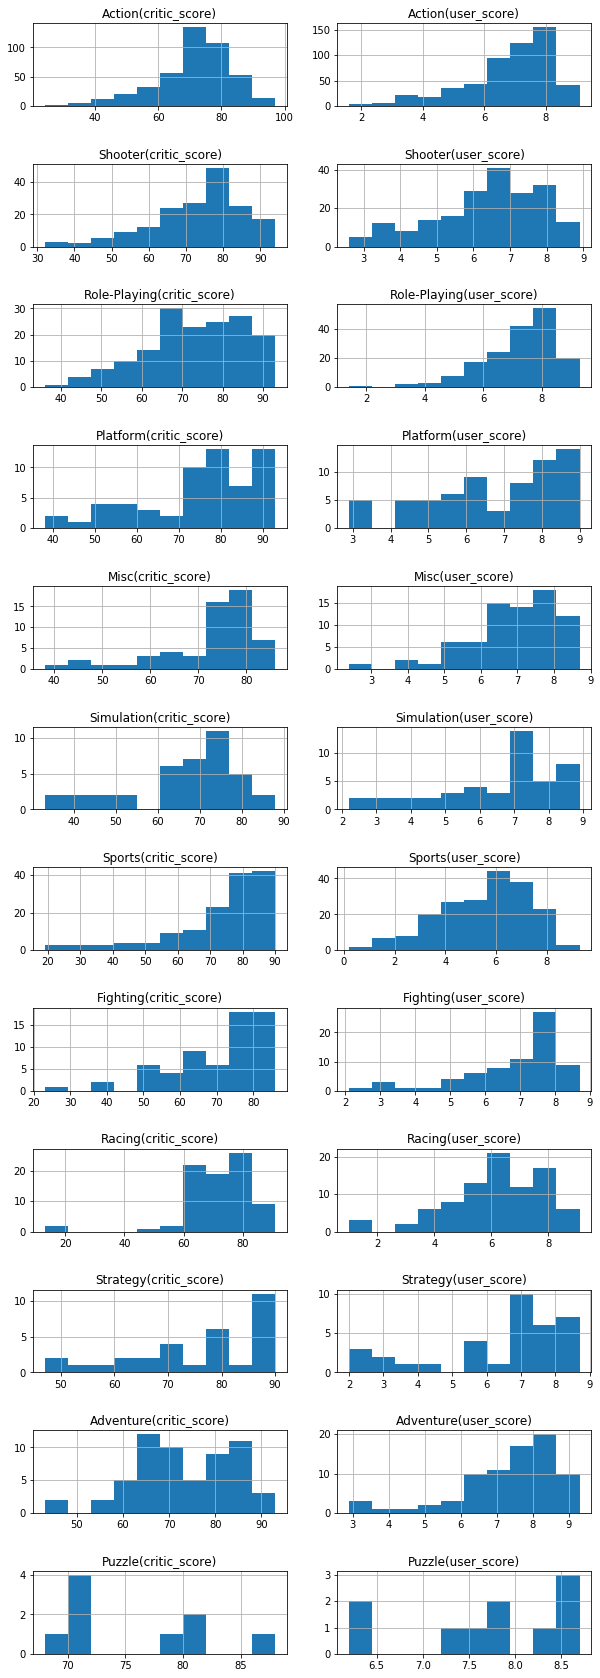

In [87]:
# посмотроение гистаграмм для каждого жанра по оценке пользователей и экспертов

nrow = len(games_df_important['genre'].unique())
ncol = 2
f, axes = plt.subplots(nrow, ncol, figsize=(10,30))
plt.subplots_adjust(hspace=0.7)

for r, genre_name in enumerate(games_df_important['genre'].unique()):
    for c, score_name in enumerate(['critic_score','user_score']):
        games_df_important.query('genre == @genre_name')[score_name].hist(ax=axes[r,c])
        axes[r,c].set_title(genre_name+'({})'.format(score_name))
    
    #print(len(games_df_important.query('genre == @genre_name')))

Жанр "Pazzle" имеет меньше всего значений, поэтому распределение совсем не похоже на нормально. Данные по жанру "Pazzle следовало бы обогащать, либо не учитывать.

<b> Вывод по шагу 6</b> 
- По многим жанрам распределение похоже на нормальное, только по некоторым жанрам кол-во данных нехватает (как, например по Pazzle ~ 28)
- Средние оценка пользователей и оценка критиков по жанрам схожи, только в жанре Sports средняя оценка пользователей оказалась на 2 порядка ниже, чем оценка критиков

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Анализ проведен. Как думаешь, чпочему по большинству жанров мы имеем скашенные влево распределения? 

</div>

<div class="alert alert-block alert-info">
<font size="2"><b>Правки_1 </b></font> 

Рассматриваемому периоду не характерно нормальное распределение (не считаю, что у нас недостаточно данных).
Причина длинного хвоста слева, в том, что индустрия развивается и игры становится только лучше. Требования покупателей запаздывают относительно предложений рынка. Рынок игр предсказывает требования покупателей, поэтому, чаще встречаются боле высокие оценки. 
    
Так же, можно отметить, что если игра получает хотябы одну высокую оценку, больше вероятность, что ее купят. Поэтому больше вероятность, что она будет оценена следующими покупателями и экспертами. 

</div>

<a id='step_7'></a>
# Шаг 7. Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.


Необходимо пояснить:
- Как сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

## Проверка гипотезы - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Необходимо сформулировать гипотезу H₀ и провести статистический тест. 
H₀ всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все значения, полученные эмпирически, не были экстремальными, а лежали там, где ожидаем их найти.

Сформулируем нулевую гипотезу H₀ следующим образов: «нет, разницы нет, то есть исследуемые средние пользовательских рейтингов платформ Xbox One и PC равны».

In [88]:
sample_1 = games_df_important.query('platform == "XOne"')['user_score'].dropna()
sample_2 = games_df_important.query('platform == "PC"')['user_score'].dropna()

print('Размер выборки по XOne равен {}'.format(len(sample_1)))
print('Размер выборки по PC равен {}'.format(len(sample_2)))

# проверка дисперсии выборок, 
# чтобы понять с каким параметро equal_var [True, False] 
# проверять гипотезу через T-критерий Стьюдента

print('Дисперсия выборки по XOne равен {:.2f}'.format(sample_1.var()))
print('Дисперсия выборки по PC равен {:.2f}'.format(sample_2.var()))

print('Расхождение дисперсии: {:.1%}'.format((sample_2.var()/sample_1.var())-1))

Размер выборки по XOne равен 185
Размер выборки по PC равен 208
Дисперсия выборки по XOne равен 1.88
Дисперсия выборки по PC равен 2.78
Расхождение дисперсии: 47.5%


<div class="alert alert-block alert-info">
Расхождение дисперсий более чем в 5% говорит о необходимости исопользовать equal_var=False при проведении всех тестов.
    
Дополнительно проверим различие дисперсий по тесту Левена
</div>

In [89]:
# тест Левена для дисперсий
stat, p = st.levene(sample_1, sample_2)
print(p)

0.008886391521702765


<div class="alert alert-block alert-info">
Небольшое значение p предполагает, что совокупности не имеют одинаковых дисперсий. 
Поэтому необходимо проводить дальнейшие статистические тесты с equal_var=False
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Круто, что ты освоила данный способ проверки равенства дисперсий выборок.  

</div>

In [90]:
alpha = 0.1  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу



results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else: 
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.6149566656915995
Не получилось отвергнуть нулевую гипотезу


Решение о принятии или отвержении нулевой гипотезы принемается по p-value. Это вероятность получить наблюдаемый или ещё более далёкий от предполагаемого результат при условии, что нулевая гипотеза верна. Если это значение больше 10%, то нулевую гипотезу точно не стоит отвергать, поэтому в данном пункте было выбрано alfa = 10%

Получена довольна большая вероятность при больших выборках, поэтому может доверять полученому результату. Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" не отвергнута. 

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Прежде чем произвести проверку гипотезы через T-критерий Стьюдента произведи проверку дисперсии выборок, чтобы понять с каким параметром использовать метод проверки. Уточни параметр equal_var при проведении всех тестов. Если при их сравнении мы получим расхождение более чем в 5%, то мы можем сказать, что дисперсии различны. Также проверить равенство дисперсий нам может помочь [такой тест](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html).

</div>

<div class="alert alert-block alert-info">
<font size="2"><b>Правки_1 </b></font> 
    
Для проверки гипотезы через T-критерий Стьюдента, необходимо учитывать параметр:
- equal_var=True, если дисперсии выборок близки (значение по умолчанию);
- equal_var=False, если дисперсии выборок различны (расхождение более чем в 5%);
    
Дисперсии выборок по платформам Xbox One и PC - различны, поэтому в тестах был использован параметр equal_var=False. Хотя итоговый результат не изменился, при рассмотрении других задач ответ может отличаться.
    
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Уточнение данного параметра позволяет нам увеличить точность проводимых тестов. 

</div>

## Проверка гипотезы - средние пользовательские рейтинги жанров Action и Sports разные.

Далее будет проведено 2 односторонних тест: тест влево, тест вправо, а так же двусторонний тест


### Односторонний тест влево.
Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые
Альтернативная гипотеза: среднее пользовательского рейтинга жанра Action меньше, чем среднее пользовательского рейтинга жанра Sports.


Тогда нулевая и альтернативная гипотеза выглядят так (Хa — это среднее значение для жанра Action, Хs — это среднее значение для жанра Sports): \
H₀: Хa = Xs\
H₁: Хa < Xs 



In [91]:
alpha = 0.001  # критический уровень статистической значимости 
# если p-value окажется меньше него - отвергнем гипотезу

sample_1 = games_df_important.query('genre == "Action"')['user_score'].dropna()
sample_2 = games_df_important.query('genre == "Sports"')['user_score'].dropna()

print('Размер выборки по Actions равен {}'.format(len(sample_1)))
print('Размер выборки по Sports равен {}'.format(len(sample_2)))

# проверка дисперсии выборок, 
# чтобы понять с каким параметро equal_var [True, False] 
# проверять гипотезу через T-критерий Стьюдента

print('Дисперсия выборки по Actions равен {:.2f}'.format(sample_1.var()))
print('Дисперсия выборки по Sports равен {:.2f}'.format(sample_2.var()))
print('Расхождение дисперсии: {:.1%}'.format((sample_2.var()/sample_1.var())-1))
# тест Левена для дисперсий
stat, p = st.levene(sample_1, sample_2)
print(p)

Размер выборки по Actions равен 544
Размер выборки по Sports равен 200
Дисперсия выборки по Actions равен 1.99
Дисперсия выборки по Sports равен 3.10
Расхождение дисперсии: 55.5%
2.490569758845928e-05


In [92]:
results = st.ttest_ind(sample_1, sample_2, equal_var=False)

# тест односторонний: p-value будет в два раза меньше
print('p-значение: ', results.pvalue / 2)

# тест односторонний влево
if (results.pvalue / 2 < alpha) and (sample_1.mean() < sample_2.mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  7.130764649657025e-19
Не получилось отвергнуть нулевую гипотезу


Как видно из кода, при одностороннем тесте с альтернативной гипотезой «среднее пользовательского рейтинга жанра Action меньше, чем среднее пользовательского рейтинга жанра Sports» мы отвергаем нулевую гипотезу, если выполняется два условия:
- наблюдаемое среднее пользовательского рейтинга жанра Action меньше, чем наблюдаемое среднее пользовательского рейтинга жанра Sports;
- разница между величинами статистически значима (причём p-value, полученное в результате двухстороннего теста, делили на 2).

По итогам одностороннего теста влева нельзя сделать отвергнуть нулевую гипотезу.

### Односторонний тест вправо.
Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые
Альтернативная гипотеза: среднее пользовательского рейтинга жанра Action больше, чем среднее пользовательского рейтинга жанра Sports.
Тогда нулевая и альтернативная гипотеза выглядят так (Хa — это среднее значение для жанра Action, Хs — это среднее значение для жанра Sports): \
H₀: Хa = Xs\
H₁: Хa < Xs 

или 
H₀: Хa = Xs\
H₁: Хa > Xs 

In [93]:
# тест односторонний вправо:
# отвергаем гипотезу только если одно среднее значимо больше другого среднего
if (results.pvalue / 2 < alpha) and (sample_1.mean() > sample_2.mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Отвергаем нулевую гипотезу


Как видно из кода, при одностороннем тесте с альтернативной гипотезой «среднее пользовательского рейтинга жанра Action больше, чем среднее пользовательского рейтинга жанра Sports» мы отвергаем нулевую гипотезу, если выполняется два условия:
- наблюдаемое среднее пользовательского рейтинга жанра Action больше, чем наблюдаемое среднее пользовательского рейтинга жанра Sports;
- разница между величинами статистически значима.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

В принципе, односторонние тесты нас проводить не просят. Однако здорово, что ты умеешь их осуществлять. 

</div>

### Двусторонний тест
Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые
Альтернативная гипотеза: среднее пользовательского рейтинга жанра Action отличается от среднего пользовательского рейтинга жанра Sports.


Тогда нулевая и альтернативная гипотеза выглядят так: \
H₀: Хa = Xs\
H₁: Хa != Xs 

In [94]:
if (results.pvalue < alpha) and (sample_1.mean() != sample_2.mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Отвергаем нулевую гипотезу


Альтернативные гипотезы принимаются тогда и только тогда, когда опровергается нулевая гипотеза. Это бывает в случаях, когда различия, скажем, в средних настолько значимы (статистически достоверны), что риск ошибки отвергнуть нулевую гипотезу и принять альтернативную не превышает одного из трех принятых уровней значимости статистического вывода.
Взят третий уровень значимости - 0.1 % (т.е. допускается риск ошибится только в одном случае из тысячи), что предъявляет очень высокие требования к обоснованию достоверности результатов.

Был проведен ряд эксперимонтов для alpha = [0.05, 0.01. 0.001], но это не повлияло на результат. 
Исходя из 2.1 - 2.3 установлено, что: 
- Не опровергаем альтернативную гипотезу, что среднее пользовательского рейтинга жанра Action больше, чем среднее пользовательского рейтинга жанра Sports;
- Опровергаем нулевую гипотезу, что средние пользовательского рейтинги жанров Action и Sports одинаковые.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Гипотезы сформулированы и проверены верно. Уточни параметр equal_var при проведении всех тестов. 

</div>

<div class="alert alert-block alert-info">
<font size="2"><b>Правки_1 </b></font> 
    
Для проверки гипотезы через T-критерий Стьюдента учла параметр equal_var
Во всех тестах выше установила equal_var=False,так как дисперсия выборок различна (расхождение более чем в 5%, тест Левена на равенство дисперсий вернул малые значения);
    
</div>

<b> Вывод по Шагу 7:</b>
    1. Нулевая гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" не отвергнута;
    2. Нулевая гипотеза "Средние пользовательские рейтинги жанров Action и Sports одинаковые" отвергнута;
    3. Альтернативная гипотеза "Средние пользовательские рейтинги жанра Action больше, чем средние пользовательские рейтинги жанра Sports" не отвергнута;

При это был использован t-тест, автоматически оценено, достаточно ли близко t-распределение Стьюдента для данных подобралось к нормальному.

---------------

<a id='step_8'></a>
# Шаг 8. Общий вывод

По результатам анализа данным  за 2012-2016, предлагаются следующие корректировки в планирование рекламной кампании и закупок. Для Северной Америки и в Европe выделить больше средств для продвижения игр самых популярных жанры: 'Action', 'Shooter', 'Sports', 'Role-Playing', для самых популярных платформ: 'PS4', 'PS3', 'X360', 'XOne', '3DS'. Следует обращать больше внимания на оценки экспертов, так как потребители при покупке игры больше обращают внимания на оценки экспертов, чем других пользователей. \
При планировании продаж и рекламной кампании в Японии, следует учесть, что покупатели предпочитают местные платформы - самая популярная платформа в Японии стала '3DS'. Обращаться внимание на популярные жанры в Японии: 'Role-Playing', 'Action', 'Misc', 'Simulation', 'Fighting'.\
Игры "Подросткам" популярны во всех регионах. 
Замечено, что каждые 5 лет появляется/сменяется популярная платформа, поэтому анализ данных и прогнозирование необходимо проводить регулярно. На данный момент из представленных на рынке платформ, большей популярностью будет пользоваться 'PS4', если смотреть по всем регионам.

Это те выводы, которые я хотела бы передать коллегам в первую очередь в пятиминутной беседе. Более детальные выводы с указанием конкретных цифр приведены в каждом пункте анализа. 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Также можно расписать все, что было сделано в ходе проведения работы. Еще лучше будет, если приведешь рекомендации для компании по дальнейшим действиям. 

</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Если тебе нравится тема визуализации, то можешь изучить методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты проделала большую работу, молодец! Критических замечаний немного. Однако с ними важно поработать и их исправить. Также есть достаточное число желтых комментариев. Думаю, исправить их тебе не составит труда. Жду твою работу :)

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Помарки исправлены, и теперь работа выполнена хорошо. Ты здорово поработала, молодец. Поздравляю со сданным проектом. Надеюсь, он был интересен и познавателен. Спасибо за оставленные комментарии по исправлениям. Успехов в дальнейшем пути :)

</div>